In [1]:
import torch

In [64]:
dataset_size=5000

In [65]:
torch.rand((1))

tensor([0.1161])

In [66]:
x=torch.ones(dataset_size,2)

In [67]:
torch.zeros(2,1).uniform_(-10,10)

tensor([[-3.3769],
        [ 9.8707]])

In [68]:
x[:,1]=torch.zeros(dataset_size).uniform_(-10,10)

In [69]:
x

tensor([[ 1.0000, -4.7242],
        [ 1.0000,  3.6377],
        [ 1.0000,  8.0648],
        ...,
        [ 1.0000,  7.9054],
        [ 1.0000, -8.0568],
        [ 1.0000,  8.9812]])

In [70]:
parm=torch.tensor([[3.],[2.]])

In [71]:
y=(x@parm)+torch.rand((dataset_size,1))*25

In [72]:
import matplotlib.pyplot as plt

In [73]:
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
# x=(x-x.mean())/x.std()
# y=(y-y.mean())/y.std()


In [74]:
 %matplotlib inline

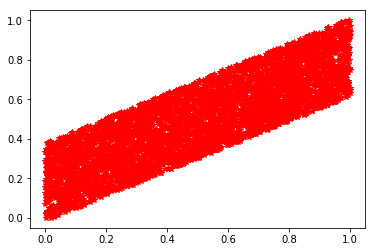

In [75]:
plt.plot(x[:,1].numpy(),y.numpy(),'*r')

def loss(y_pred,y_act):
    return (((y_pred-y_act)**2).mean()**(1/2))

In [76]:
loss=torch.nn.MSELoss()
# loss=torch.nn.CosineEmbeddingLoss()

In [77]:
test_parm=torch.nn.Parameter(torch.rand(2,1))

In [78]:
loss(x@test_parm,y)

tensor(0.1478, grad_fn=<MseLossBackward>)

In [85]:
epoch=700
lr=9e-3

class model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.first=torch.nn.Linear(1 ,100)
        self.second=torch.nn.Linear(100,100)
        self.third=torch.nn.Linear(100,100)
        self.fourth=torch.nn.Linear(100,100)
        self.fifth=torch.nn.Linear(100,100)
        self.sixth=torch.nn.Linear(100,100)
        self.seventh=torch.nn.Linear(100,100)
        self.eight=torch.nn.Linear(100,100)
        self.ninth=torch.nn.Linear(100,1)
        
    def forward(self,x):
        res1=self.first(x).relu()
        res2=self.second(res1).relu()
        res3=self.third(res2).relu()
        res4=self.fourth(res3).relu()
        res5=self.fifth(res4).relu()
        res6=self.sixth(res5).relu()
        res7=self.seventh(res6).relu()
        res8=self.eight(res7).relu()
        res9=self.ninth(res8)
        return res9

obj=model().cuda()

opt=torch.optim.Adam(obj.parameters(),lr=lr,weight_decay=1e-4)


for _ in range(epoch):
    y_pred=obj(x[:,1].cuda().view(dataset_size,-1))
    loss_to_optimise=loss(y_pred,y.cuda())
    opt.zero_grad()
    loss_to_optimise.backward()
    opt.step()    
    
print("loss => ",loss(obj(x[:,1].cuda().view(dataset_size ,-1)),y.cuda()))

loss =>  tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward>)


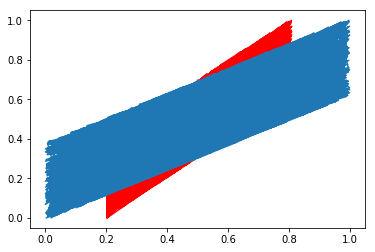

In [86]:
plt.plot(obj(x[:,1].cuda().view(dataset_size ,-1)).cpu().detach().numpy(),y.cpu().detach().numpy(),'r-',x[:,1].numpy(),y.numpy())